In [15]:
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.config.set_visible_devices([], 'GPU')
from keras.preprocessing import image
from keras.applications import inception_v3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras import backend as K
from PIL import Image
import os
import sys
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

### Load inceptionv3 model

In [16]:
model = inception_v3.InceptionV3()
# model.summary()

2025-02-22 12:18:37.323733: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_291/moving_mean/Assign' id:21957 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_291/moving_mean/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_291/moving_mean, batch_normalization_291/moving_mean/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [17]:
def predict_img(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    original_image = image.img_to_array(img)
    original_image /= 255.
    original_image -= 0.5
    original_image *= 2.
    x = np.expand_dims(original_image, axis=0)
    pred = model.predict(x)
    print('\033[92m Model Predictions: '+str(decode_predictions(pred, top=3))+'\033[0m')


### Prediction using inceptionv3 model

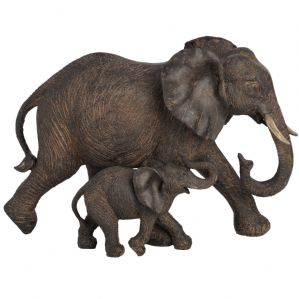

2025-02-22 12:18:41.194774: W tensorflow/c/c_api.cc:304] Operation '{name:'predictions_3/Softmax' id:27016 op device:{requested: '', assigned: ''} def:{{{node predictions_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](predictions_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


 Model Predictions: [[('n02504013', 'Indian_elephant', 0.93879485), ('n01871265', 'tusker', 0.019437166), ('n01704323', 'triceratops', 0.010561407)]]


In [18]:
#replace the image path
img_path = './elephant.jpg'

# Display image
display(Image(filename=img_path)) 

# Predict class
predict_img(img_path)